# Analyzing KNN Hyperparameters

In [ ]:
# Prototype
import sys
# This allows us to import the nucml utilities
sys.path.append("../..")

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

import nucml.model.utilities as model_utils
import nucml.model.plot as model_plots

## Loading KNN Training Results

In [9]:
results_b0 = pd.read_csv("knn_results_B0.csv").sort_values(by="id")
results_b1 = pd.read_csv("knn_results_B1.csv").sort_values(by="id")
results_b2 = pd.read_csv("knn_results_B2.csv").sort_values(by="id")
results_b3 = pd.read_csv("knn_results_B3.csv").sort_values(by="id")
results_b4 = pd.read_csv("knn_results_B4.csv").sort_values(by="id")

In [11]:
results_b0["scale_energy"] = results_b0.run_name.apply(lambda x: True if "v2" in x else False)
results_b0["Model"] = results_b0.model_path.apply(lambda x: os.path.basename(os.path.dirname(x)))

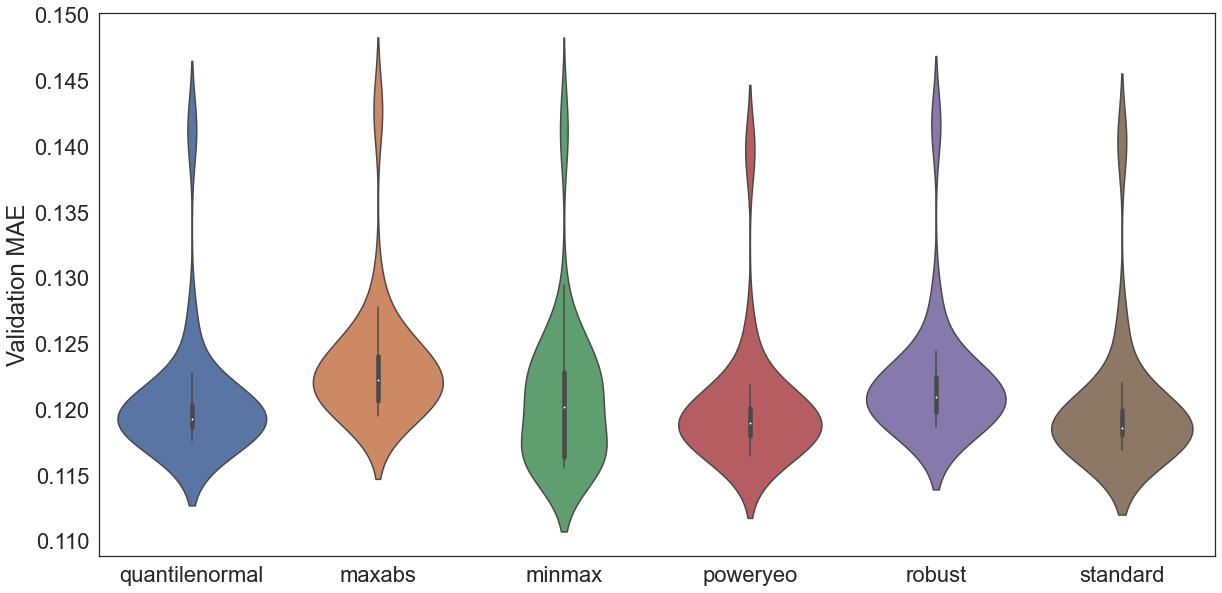

In [118]:
plt.figure(figsize=(20,10))
sns.violinplot(x="normalizer", y="val_mae", data=results_b0)
# sns.catplot(x="normalizer", y="val_mae", data=results_b0, height=10, aspect=2)
plt.ylabel("Validation MAE")
plt.xlabel("")
plt.savefig("figures/knn_norm_effect.png", bbox_inches='tight', dpi=300)

In [112]:
sns.set(font_scale=2)
sns.set_style('white')

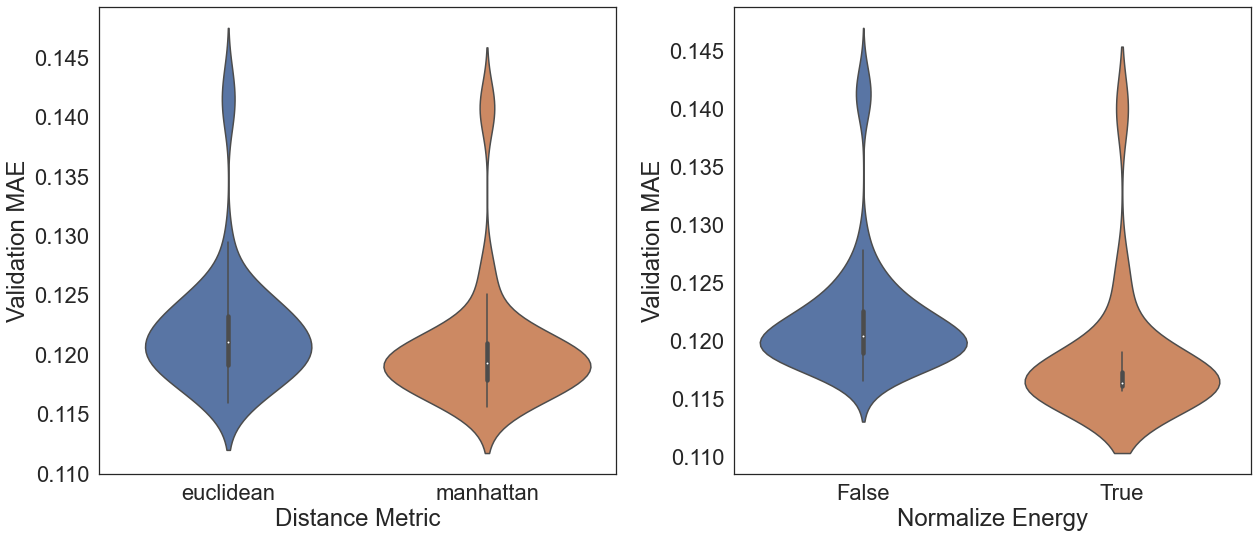

In [115]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,8))

# plt.figure(figsize=(10,8))
sns.violinplot(x="distance_metric", y="val_mae", data=results_b0, ax=ax1)
sns.violinplot(x="scale_energy", y="val_mae", data=results_b0, ax=ax2)
plt.ylabel("Validation MAE")
ax1.set_xlabel("Distance Metric")
ax2.set_xlabel("Normalize Energy")
ax1.set_ylabel("Validation MAE")
ax2.set_ylabel("")
ax2.set_ylabel("Validation MAE")
# ax1.set_ylim(top=0.130)
# ax2.set_ylim(top=0.130)
fig.tight_layout()
plt.savefig("figures/knn_distance_metric_energy_normalize.png", bbox_inches='tight', dpi=300)

## Finding Best Model Overall

In [58]:
b0_min = results_b0.train_mae.min()
b1_min = results_b1.train_mae.min()
b2_min = results_b2.train_mae.min()
b3_min = results_b3.train_mae.min()
b4_min = results_b4.train_mae.min()

best_dataset = pd.DataFrame({"Train_MAE":[b0_min, b1_min, b2_min, b3_min, b4_min], "Dataset":["A", "B", "C", "D", "E"]})
best_dataset[best_dataset.Train_MAE == best_dataset.Train_MAE.min()]

,Train_MAE,Dataset
0,0.025789,A


In [59]:
b0_min = results_b0.val_mae.min()
b1_min = results_b1.val_mae.min()
b2_min = results_b2.val_mae.min()
b3_min = results_b3.val_mae.min()
b4_min = results_b4.val_mae.min()

best_dataset = pd.DataFrame({"Train_MAE":[b0_min, b1_min, b2_min, b3_min, b4_min], "Dataset":["A", "B", "C", "D", "E"]})
best_dataset[best_dataset.Train_MAE == best_dataset.Train_MAE.min()]

,Train_MAE,Dataset
4,0.115209,E


In [92]:
best_b0 = model_utils.get_best_models_df(validation_iterations, keep_first=True)
best_b1 = model_utils.get_best_models_df(results_b1, keep_first=True)
best_b2 = model_utils.get_best_models_df(results_b2, keep_first=True)
best_b3 = model_utils.get_best_models_df(results_b3, keep_first=True)
best_b4 = model_utils.get_best_models_df(results_b4, keep_first=True)

In [93]:
best_b0["dataset"] = "b0"
best_b1["dataset"] = "b1"
best_b2["dataset"] = "b2"
best_b3["dataset"] = "b3"
best_b4["dataset"] = "b4"

In [98]:
all_best_models = best_b0.append(best_b1).append(best_b2).append(best_b3).append(best_b4)[['dataset', 'id', 'train_mae', 'val_mae', 'test_mae', 'tag']]
all_best_models = all_best_models[all_best_models.tag == "Val"].drop(columns=['tag'])
all_best_models['dataset'] = ['A', 'B', 'C', 'D', 'E']
all_best_models.columns = ['Dataset', 'ID', 'Train MAE', 'Val MAE', 'Test MAE']
all_best_models

,Dataset,ID,Train MAE,Val MAE,Test MAE
166,A,9,0.025922,0.119721,0.119763
1,B,9,0.025921,0.119010,0.118578
8,C,11,0.025873,0.115434,0.115954
7,D,13,0.025876,0.115373,0.115669
1,E,13,0.025852,0.115209,0.116056


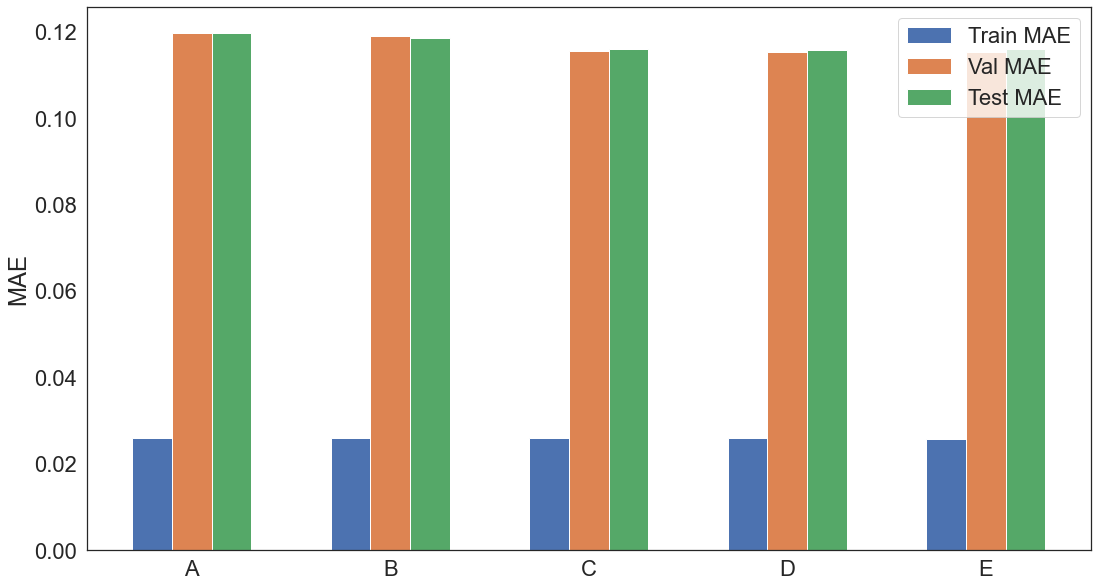

In [119]:
train_mae = all_best_models["Train MAE"].values
val_mae =  all_best_models["Val MAE"].values
test_mae =  all_best_models["Test MAE"].values

x = np.arange(len(all_best_models))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(18,10))
rects1 = ax.bar(x - width, train_mae, width, label='Train MAE')
rects2 = ax.bar(x, val_mae, width, label='Val MAE')
rects3 = ax.bar(x + width, test_mae, width, label='Test MAE')

ax.set_ylabel('MAE')
ax.set_xticks(x)
ax.set_xticklabels(all_best_models.Dataset.values)
ax.legend()

In [99]:
print(all_best_models.to_latex(index=False))

\begin{tabular}{lrrrr}
\toprule
Dataset &  ID &  Train MAE &  Val MAE &  Test MAE \\
\midrule
      A &   9 &   0.025922 & 0.119721 &  0.119763 \\
      B &   9 &   0.025921 & 0.119010 &  0.118578 \\
      C &  11 &   0.025873 & 0.115434 &  0.115954 \\
      D &  13 &   0.025876 & 0.115373 &  0.115669 \\
      E &  13 &   0.025852 & 0.115209 &  0.116056 \\
\bottomrule
\end{tabular}



## Training Curves for All Datasets

In [67]:
sns.set(font_scale=2.5)
sns.set_style('white')

In [87]:
best_b0 = model_utils.get_best_models_df(results_b0, keep_first=True)

In [82]:
best_parameters_b0 = model_utils.get_parameters_from_line(best_b0.iloc[[1]])
validation_iterations = model_utils.filter_by_parameters(results_b0, best_parameters_b0).sort_values('id')
validation_iterations = validation_iterations[validation_iterations.scale_energy == False]

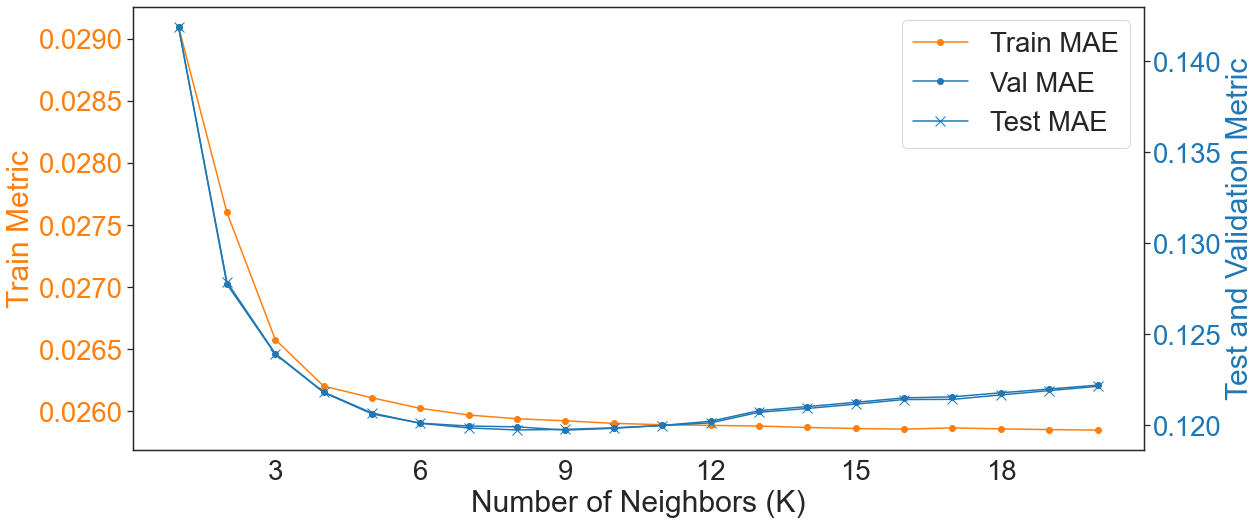

In [102]:
model_plots.knn_training(validation_iterations, save=True, save_path='figures/knn_training_b0.png')

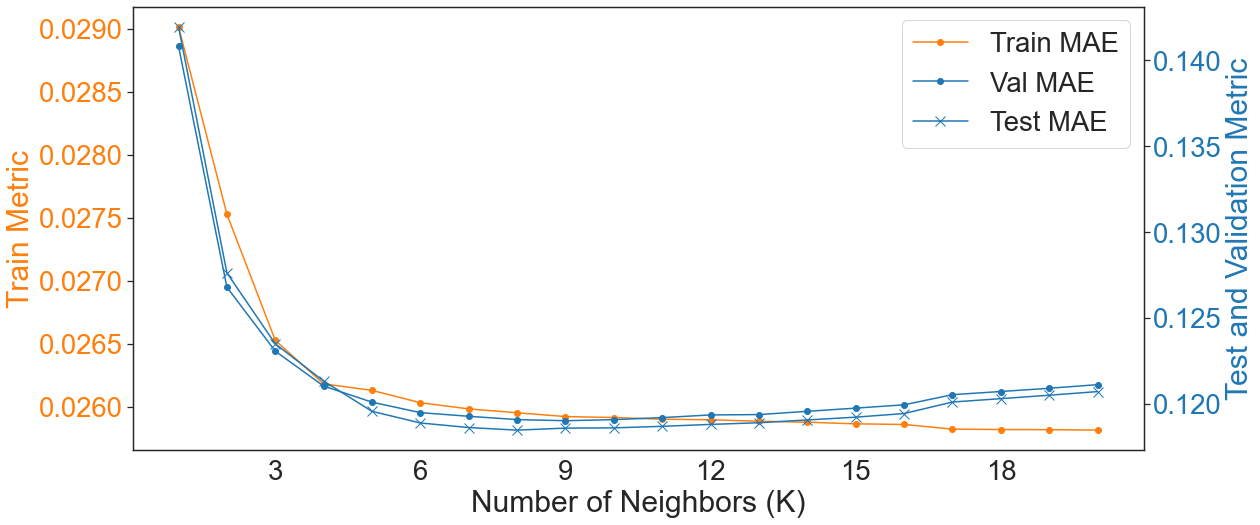

In [103]:
model_plots.knn_training(results_b1, save=True, save_path='figures/knn_training_b1.png')

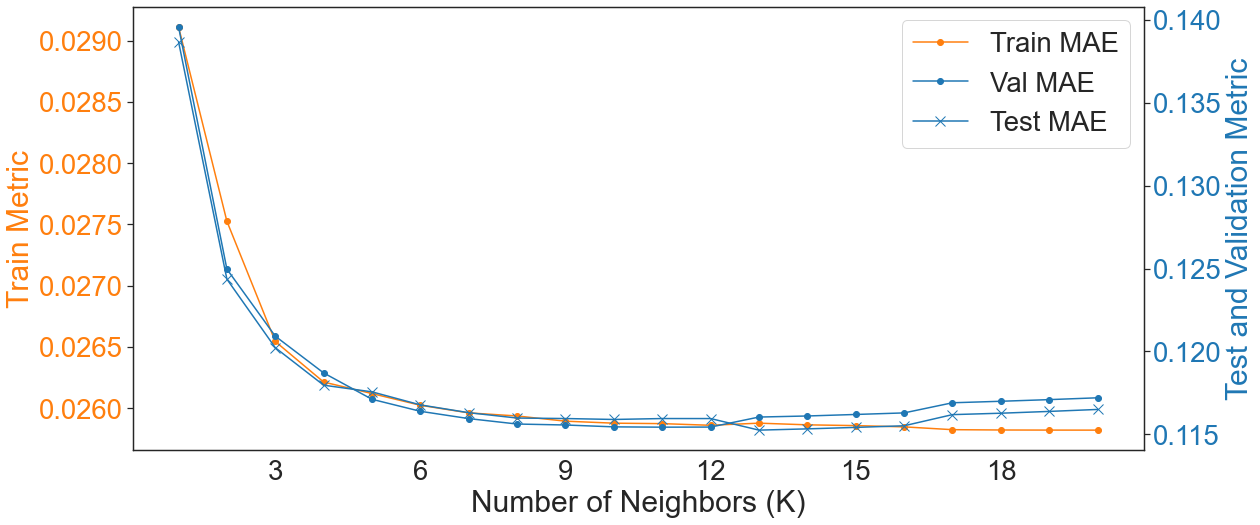

In [104]:
model_plots.knn_training(results_b2, save=True, save_path='figures/knn_training_b2.png')

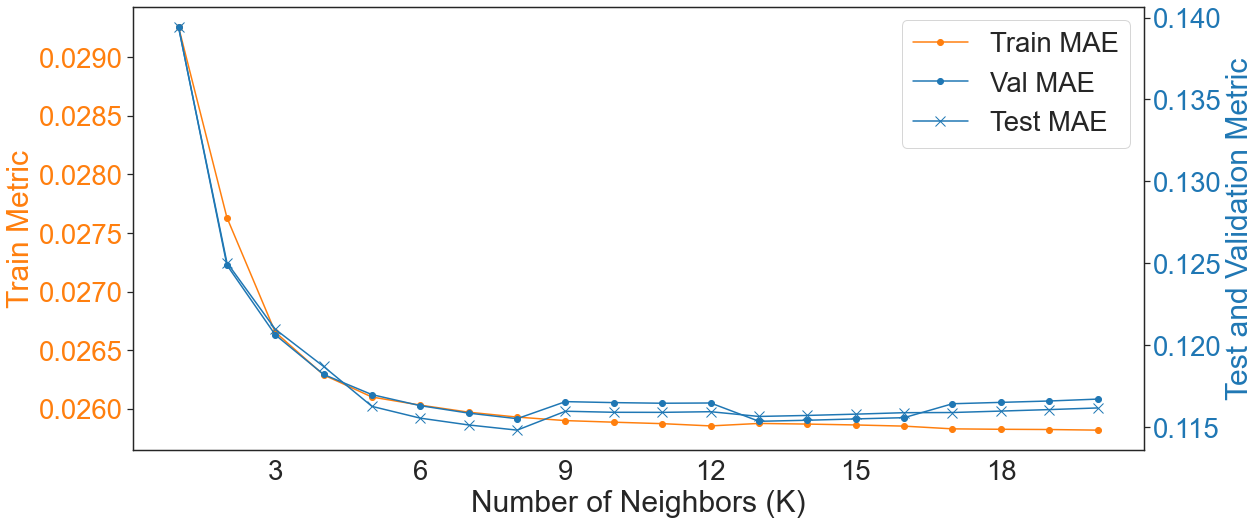

In [105]:
model_plots.knn_training(results_b3, save=True, save_path='figures/knn_training_b3.png')

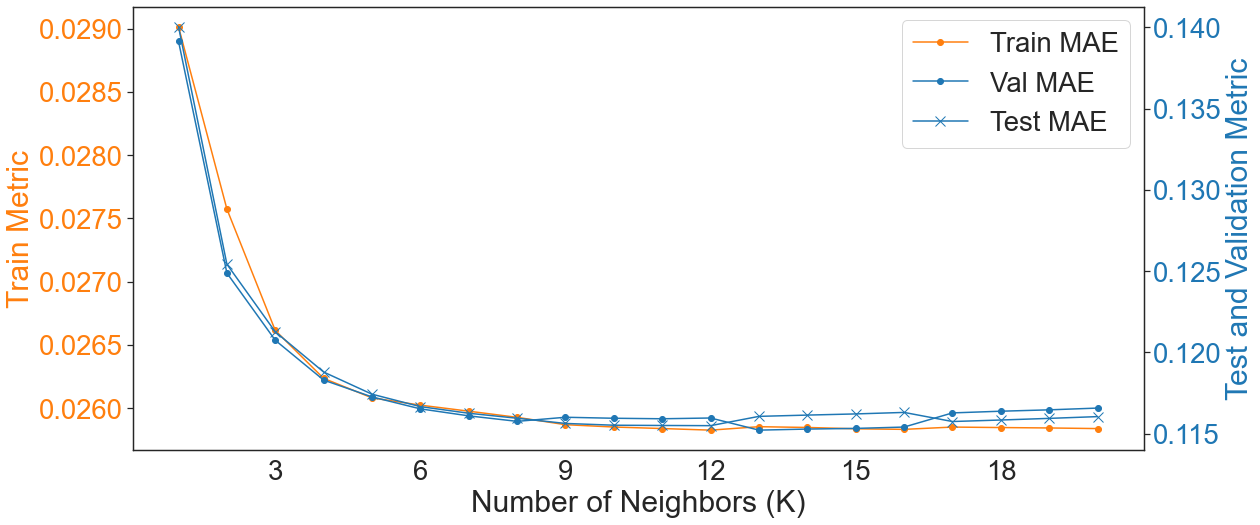

In [106]:
model_plots.knn_training(results_b4, save=True, save_path='figures/knn_training_b4.png')